`# Ali Rezapour / @alirzpour`

# **>iranian_lisense_plate_detection_and_recognition**

In [1]:
import torch

**we use yolov5, then clone it**

In [2]:
!git clone  https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12363, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 12363 (delta 16), reused 8 (delta 2), pack-reused 12335
Receiving objects: 100% (12363/12363), 12.18 MiB | 8.63 MiB/s, done.
Resolving deltas: 100% (8530/8530), done.


In [3]:
cd yolov5

/content/yolov5


In [4]:
pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 33.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**then We import the essentials for our license_plate Network**

In [5]:
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

first add databast to colab direcrtory and
Next we partition the dataset into train, validation, and test sets containing 80%, 10%, and 10% of the data, respectively

In [ ]:
cd /content

/content


first we shuold Unzip the dataset.

In [1]:
!unzip lisense_plate_dataset.zip

Archive:  lisense_plate_dataset.zip
   creating: lisense_plate_dataset/
   creating: lisense_plate_dataset/images/
   creating: lisense_plate_dataset/labels/


There’s one issue.Since we have used the labelimg Application, We have a single class (license-plate), but the coordinate files from labelimg app say the class index is 15, which makes no sense.

In [ ]:
import glob
# Contains all .txt files except our list of classes
txt_files = [file for file in glob.glob('/content/lisense_plate_dataset/labels/*.txt') if file != '/content/lisense_plate_dataset/labels/classes.txt']
# Read every .txt file and store it's content into variable curr
for file in txt_files:
    with open(file, 'r') as f:
        curr = f.read()     
# Replace class index 15 with 0 and store it in a variable new
new = curr.replace('15 ', '0 ')
# Once again open every .txt file and make the replacement
for file in txt_files:
    with open(file, 'w') as f:
        f.write(new)

In [ ]:
cd /content/

/content


second we diving data

In [ ]:
# Read images and labels
images = [os.path.join('lisense_plate_dataset/images', x) for x in os.listdir('lisense_plate_dataset/images')]
labels = [os.path.join('lisense_plate_dataset/labels', x) for x in os.listdir('lisense_plate_dataset/labels') if x[-3:] == "txt"]

images.sort()
labels.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2, random_state = 1)
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size = 0.5, random_state = 1)

Create the folders to keep the splits.

In [ ]:
!mkdir lisense_plate_dataset/images/train lisense_plate_dataset/images/val lisense_plate_dataset/images/test lisense_plate_dataset/labels/train lisense_plate_dataset/labels/val lisense_plate_dataset/labels/test


Move the files to their respective folders.

In [ ]:
cd /content/

/content


In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'lisense_plate_dataset/images/train')
move_files_to_folder(val_images, 'lisense_plate_dataset/images/val/')
move_files_to_folder(test_images, 'lisense_plate_dataset/images/test/')
move_files_to_folder(train_labels, 'lisense_plate_dataset/labels/train/')
move_files_to_folder(val_labels, 'lisense_plate_dataset/labels/val/')
move_files_to_folder(test_labels, 'lisense_plate_dataset/labels/test/')

Now we need to create a Yaml file that contains the directory of training and validation, number of classes and it’s label names. Later we need to move the .yaml file into the yolov5 directory that we cloned

Create dataset.yaml in yolov5/data directory and called lisense_plate.yaml

# **Train**

In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 16 --epochs 100 --data /content/yolov5/data/license_plate.yaml --weights yolov5s.pt --name yolo_plate_detection

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/yolov5/data/license_plate.yaml, hyp=hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_plate_detection, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

In [ ]:
!python detect.py --source /content/lisense_plate_dataset/images/test --weights runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --name yolo_plate_detction

detect: weights=['runs/train/yolo_plate_detection/weights/best.pt'], source=/content/lisense_plate_dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_detction, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/24 /content/lisense_plate_dataset/images/test/car_108.jpeg: 416x640 1 license_plate, Done. (0.015s)
image 2/24 /content/lisense_plate_dataset/images/test/car_115.jpeg: 480x640 2 license_plates, Done. (0.017s)
image 3/24 /content/lisense_plate_dataset/images/test/car_124.jpeg: 480x640 1 license_plate, Done.

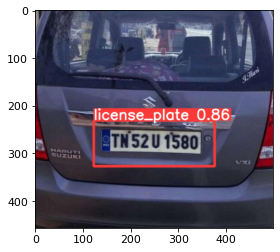

In [401]:
detections_dir = "/content/yolov5/runs/detect/yolo_plate_detction"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
cd /content/

/content


In [ ]:
!unzip lisense_plate_farsi.zip

Archive:  lisense_plate_farsi.zip
   creating: lisense_plate_farsi/
   creating: lisense_plate_farsi/lisense_plate_farsi/
   creating: lisense_plate_farsi/lisense_plate_farsi/images/
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/1.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/10.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/100.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/101.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/102.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/103.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/104.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/105.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/106.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/107.jpg  
  inflating: lisense_plate_farsi/lisense_plate_farsi/images/108.jpg  
  inflating: lisense_plate_farsi/lisense_plate_far

In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!python detect.py --source /content/lisense_plate_farsi/lisense_plate_farsi/images --weights runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --name yolo_plate_detction_fa

detect: weights=['runs/train/yolo_plate_detection/weights/best.pt'], source=/content/lisense_plate_farsi/lisense_plate_farsi/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_detction_fa, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/1.jpg: 480x640 1 license_plate, Done. (0.017s)
image 2/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/10.jpg: 480x640 1 license_plate, Done. (0.011s)
image 3/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/

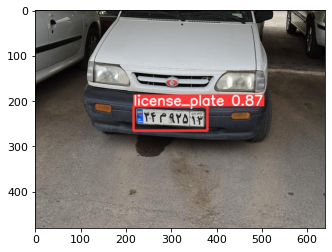

In [ ]:
detections_dir = "/content/yolov5/runs/detect/yolo_plate_detction_fa"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

**we need to extract ROI from the image inside the bounding box of the license plate automatically.**

first step is crop license_plate

In [ ]:
!python detect.py --source /content/lisense_plate_farsi/lisense_plate_farsi/images --weights runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --save-crop

detect: weights=['runs/train/yolo_plate_detection/weights/best.pt'], source=/content/lisense_plate_farsi/lisense_plate_farsi/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/1.jpg: 480x640 1 license_plate, Done. (0.016s)
image 2/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/10.jpg: 480x640 1 license_plate, Done. (0.013s)
image 3/231 /content/lisense_plate_farsi/lisense_plate_farsi/images/100.jpg: 480x640 1 l

In [ ]:
%cp /content/best.pt /content/yolov5/runs/train

In [ ]:
!python detect.py --source /content/yolov5/runs/detect/exp/crops/license_plate --weights /content/yolov5/runs/train/best.pt --conf 0.25 --name yolo_plate_detction_fa

detect: weights=['/content/yolov5/runs/train/best.pt'], source=/content/yolov5/runs/detect/exp/crops/license_plate, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_detction_fa, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients
image 1/229 /content/yolov5/runs/detect/exp/crops/license_plate/1.jpg: 192x640 2 1s, 3 3s, 1 6, 2 8s, 1 v, Done. (0.018s)
image 2/229 /content/yolov5/runs/detect/exp/crops/license_plate/10.jpg: 256x640 2 1s, 1 3, 1 5, 1 6, 2 9s, 1 d, Done. (0.018s)
image 3/229 /content/yolov5/runs/detect/exp/crops/license_plate/100

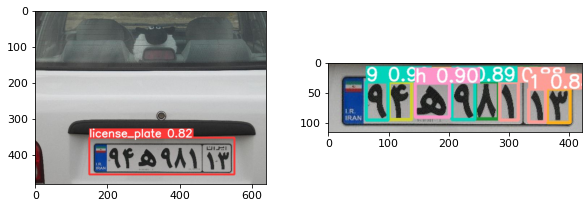

In [400]:
# create figure
fig = plt.figure(figsize=(10, 7))
detections_dir = "/content/yolov5/runs/detect/yolo_plate_detction_fa"
detections_dir2= "/content/yolov5/runs/detect/yolo_plate_detction_fa2"
detection_images[0] = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]
detection_images[1] = [os.path.join(detections_dir2, x) for x in os.listdir(detections_dir2)]
   #for idx in range(1:5000)
idx=random.randint(0, 10)
random_detection_image = Image.open(detection_images[0][idx])
random_detection_image1 = Image.open(detection_images[1][idx])
# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
plt.imshow(np.array(random_detection_image))
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
plt.imshow(np.array(random_detection_image1))

**Hide the box around the characters for better image clarity**

In [ ]:
!python detect.py --source /content/yolov5/runs/detect/exp/crops/license_plate --weights /content/yolov5/runs/train/best.pt --hide-conf --name yolo_plate_detction_fa

detect: weights=['/content/yolov5/runs/train/best.pt'], source=/content/yolov5/runs/detect/exp/crops/license_plate, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_detction_fa, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients
image 1/229 /content/yolov5/runs/detect/exp/crops/license_plate/1.jpg: 192x640 2 1s, 3 3s, 1 6, 2 8s, 1 v, Done. (0.016s)
image 2/229 /content/yolov5/runs/detect/exp/crops/license_plate/10.jpg: 256x640 2 1s, 1 3, 1 5, 1 6, 2 9s, 1 d, Done. (0.017s)
image 3/229 /content/yolov5/runs/detect/exp/crops/license_plate/100.

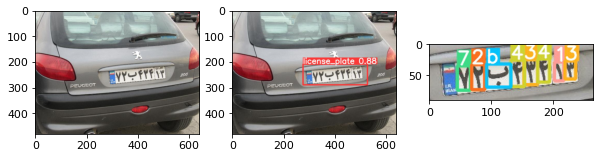

In [399]:
# create figure
fig = plt.figure(figsize=(10, 7))
detections_dir0 = "/content/lisense_plate_farsi/lisense_plate_farsi/images"
detections_dir = "/content/yolov5/runs/detect/yolo_plate_detction_fa"
detections_dir2= "/content/yolov5/runs/detect/yolo_plate_detction_fa3"
detection_images[0] = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]
detection_images[1] = [os.path.join(detections_dir2, x) for x in os.listdir(detections_dir2)]
detection_images[2] = [os.path.join(detections_dir0, x) for x in os.listdir(detections_dir0)]
   #for idx in range(1:5000)
idx=random.randint(100,115)
random_detection_image = Image.open(detection_images[0][idx])
random_detection_image1 = Image.open(detection_images[1][idx])
random_detection_image0 = Image.open(detection_images[2][idx])
# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)
plt.imshow(np.array(random_detection_image0))
fig.add_subplot(1, 3, 2)
plt.imshow(np.array(random_detection_image))
# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 3)
plt.imshow(np.array(random_detection_image1))




**liscense_plate_detection from video**

first : *license_plate* *detection*

In [ ]:
!python detect.py --source /content/plate.mp4 --weights /content/yolov5/runs/train/yolo_plate_detection/weights/best.pt --conf 0.25 --name yolo_plate_detction_fa --save-crop

detect: weights=['/content/yolov5/runs/train/yolo_plate_detection/weights/best.pt'], source=/content/plate.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_detction_fa, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
video 1/1 (1/1446) /content/plate.mp4: 480x640 2 license_plates, Done. (0.018s)
video 1/1 (2/1446) /content/plate.mp4: 480x640 2 license_plates, Done. (0.012s)
video 1/1 (3/1446) /content/plate.mp4: 480x640 2 license_plates, Done. (0.011s)
video 1/1 (4/1446) /content/plate.mp4: 480x640 2 license_plates, Done. (0.016s)
v

In [ ]:
!python detect.py --source /content/yolov5/runs/detect/yolo_plate_detction_fa4/video.mp4 --weights /content/yolov5/runs/train/best.pt --hide-conf --name yolo_plate_detction_fa

In [405]:
rm -r "/content/yolov5/runs/detect/yolo_plate_detction_fa4"

In [ ]:
# Results
results.print()  
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)